Primeras filas del dataset:
          Ubication  LstUniqueID  ScexhID LstActionCD       LstChangeDT  \
0  ASIA - Australia     17532837  7532837           U   08/08/2023 8:16   
1  ASIA - Australia      1213483   213483           U  08/08/2023 18:33   
2  ASIA - Australia     15238666  5238666           U   08/08/2023 4:38   
3  ASIA - Australia     17279138  7279138           U  08/08/2023 18:33   
4  ASIA - Australia     18603730  8603730           U   08/08/2023 4:38   

  ListCreateDT ListSourceFlag GlobalStatusCD   IssID             IssuerName  \
0   10/04/2018              M              A  203293    Adriatic Metals Plc   
1   30/04/2004              M              A   81820    Anax Metals Limited   
2   24/03/2012              M              A  149269  Armour Energy Limited   
3   14/09/2017              M              I  149269  Armour Energy Limited   
4   16/06/2020              M              A  149269  Armour Energy Limited   

   ...     CFI   CIC FISN StructCD Voting Vote

<ipython-input-2-9a2305f94c45>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LstChangeDT'] = (X['LstChangeDT'] - X['LstChangeDT'].min()).dt.days


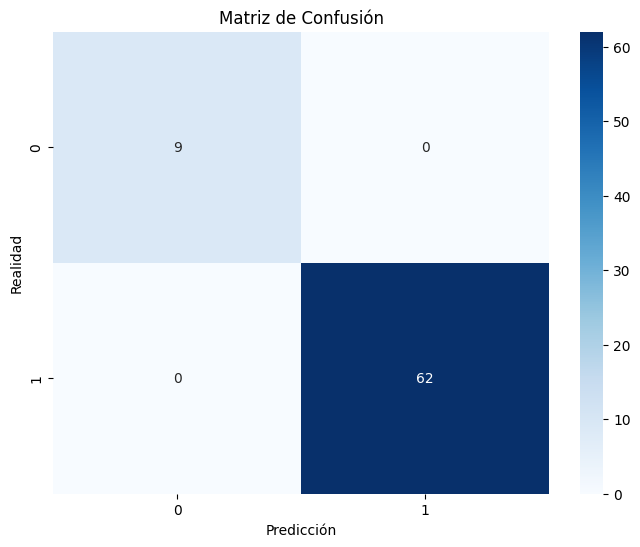


Precisión de la validación cruzada estratificada:
[0.95833333 1.         1.         1.         0.95744681]
Precisión media:
0.9831560283687943

Mejores parámetros encontrados:
{}

Área bajo la curva ROC:
1.0


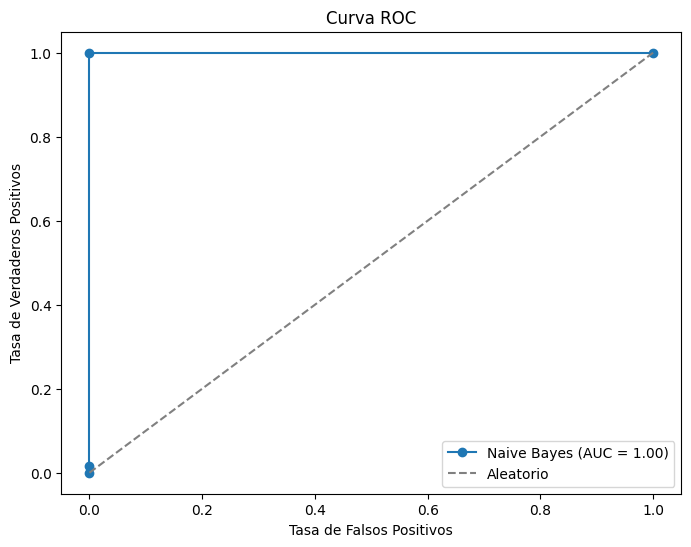

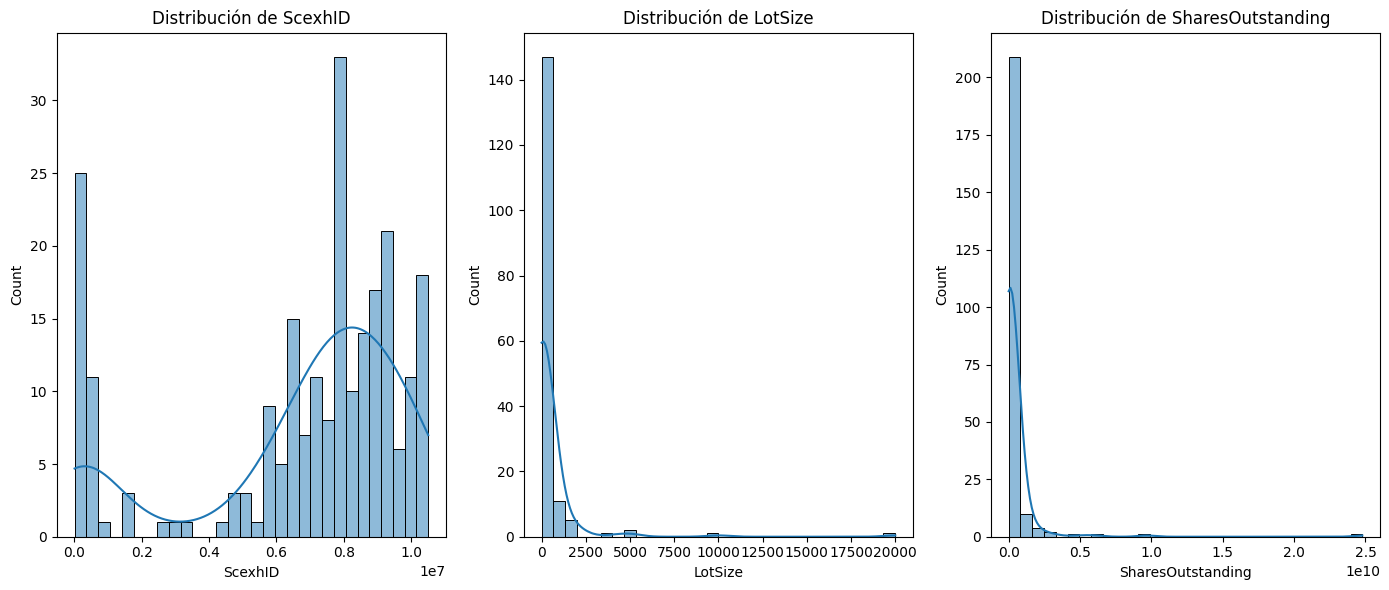

ValueError: attempt to get argmin of an empty sequence

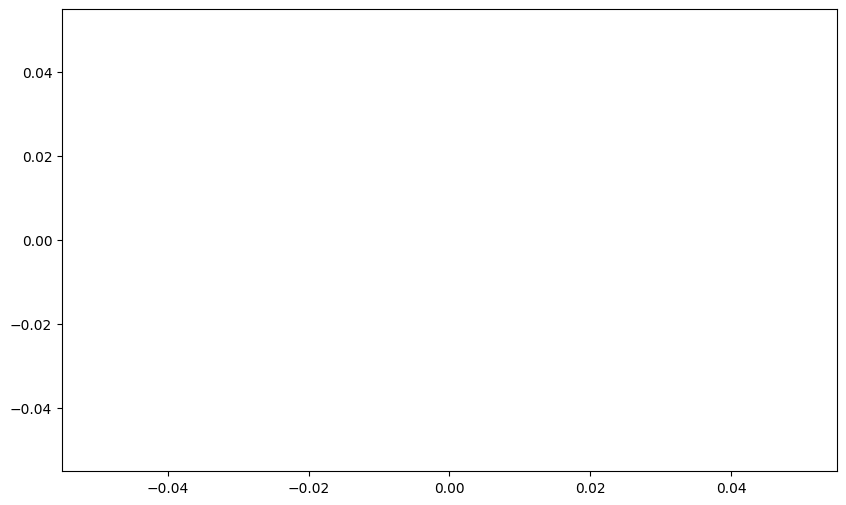

In [2]:
# PseoduProyecto en Desarrollo Utilizando Naive Bayes
# QuispeMorales,JosefhJordy

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Cargar el dataset con manejo de posibles problemas de formato
file_path = '/content/sample_data/Corporate_actions_market_data_peru.csv'

# Intenta cargar el dataset usando el delimitador adecuado
try:
    data = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')
except pd.errors.ParserError:
    print("Error al parsear el archivo CSV. Verifica el delimitador y el formato del archivo.")

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Información básica del dataset
print("\nInformación del dataset:")
print(data.info())

# Descripción estadística del dataset
print("\nDescripción estadística del dataset:")
print(data.describe())

# Verificar nombres de columnas
print("\nNombres de columnas:")
print(data.columns)

# Preprocesamiento de datos
# Convertir fechas a tipo datetime (ajusta los nombres de columnas si es necesario)
data['LstChangeDT'] = pd.to_datetime(data['LstChangeDT'], errors='coerce')
data['ListCreateDT'] = pd.to_datetime(data['ListCreateDT'], errors='coerce')

# Verificar datos después de la conversión de fechas
print("\nDatos después de la conversión de fechas:")
print(data[['LstChangeDT', 'ListCreateDT']].head())

# Aquí seleccionamos una columna numérica para el modelo
# Para fines de demostración, usaremos 'ScexhID' como característica
data['Risk'] = np.where(data['ScexhID'] > 5000000, 1, 0)

# Eliminar filas con datos faltantes
data = data.dropna(subset=['ScexhID', 'LstChangeDT'])

# Verificar la cantidad de datos después de eliminar filas con NaN
print("\nCantidad de datos después de eliminar filas con NaN:")
print(data.shape)

# Seleccionar características para el modelo
features = ['ScexhID', 'LstChangeDT']
X = data[features]
y = data['Risk']

# Convertir las fechas a valores numéricos (días desde la fecha más temprana)
X['LstChangeDT'] = (X['LstChangeDT'] - X['LstChangeDT'].min()).dt.days

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Validación Cruzada Estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=cv)
print("\nPrecisión de la validación cruzada estratificada:")
print(cv_scores)
print("Precisión media:")
print(cv_scores.mean())

# Ajuste de Hiperparámetros (Ejemplo para Naive Bayes)
param_grid = {}  # No hay hiperparámetros que ajustar para GaussianNB, pero se puede definir un grid para otros modelos
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluación del Modelo
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nÁrea bajo la curva ROC:")
print(roc_auc)

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label='Naive Bayes (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Gráficas adicionales

# 1. Distribución de las Características Numéricas
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['ScexhID'], kde=True, bins=30)
plt.title('Distribución de ScexhID')

plt.subplot(1, 3, 2)
sns.histplot(data['LotSize'], kde=True, bins=30)
plt.title('Distribución de LotSize')

plt.subplot(1, 3, 3)
sns.histplot(data['SharesOutstanding'], kde=True, bins=30)
plt.title('Distribución de SharesOutstanding')

plt.tight_layout()
plt.show()

# 2. Distribución de Fechas
if not data['LstChangeDT'].dropna().empty:  # Verifica si hay datos válidos
    plt.figure(figsize=(10, 6))
    years = data['LstChangeDT'].dt.year.dropna()  # Elimina NaN
    if not years.empty:
        sns.histplot(years, bins=range(int(years.min()), int(years.max()) + 1))
        plt.title('Distribución de Fechas de Cambio')
        plt.xlabel('Año')
        plt.ylabel('Frecuencia')
        plt.show()
    else:
        print("No hay datos válidos en la columna 'LstChangeDT' para generar el histograma.")
else:
    print("No hay datos válidos en la columna 'LstChangeDT'.")

# 3. Análisis de Correlación
plt.figure(figsize=(12, 8))
correlation_matrix = data[['ScexhID', 'LotSize', 'SharesOutstanding']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
